Vector Quantized Variational Autoencoder (VQ-VAE) was proposed in
[Neural Discrete Representation Learning](https://arxiv.org/abs/1711.00937)
by van der Oord et al. In standard VAEs, the latent space is continuous and is
sampled from a Gaussian distribution. VQ-VAEs, operate on a discrete latent
space, making the optimization problem simpler. It does so by maintaining
a discrete *codebook*. The codebook is developed by discretizing the distance 
between continuous embeddings and the encoded outputs. These discrete code words
are then fed to the decoder, which is trained to generate reconstructed samples.


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

import numpy as np
import os
# from autoencoder import Autoencoder
# from vae import VAE

LEARNING_RATE = 0.0005
BATCH_SIZE = 128
EPOCHS = 12

In [2]:
import sys
sys.path.insert(1, 'D:\Code\Data Science\Projects\music_generador_deep_learning\src/modeling')

from vq_vae import VQ_VAE

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train_scaled = (x_train / 255.0) - 0.5
x_test_scaled = (x_test / 255.0) - 0.5

data_variance = np.var(x_train / 255.0)




In [4]:
vq_vae = VQ_VAE(
    input_shape=(28, 28, 1),
    conv_filters=(32, 64),
    conv_kernels=(3, 3),
    conv_strides=(2, 2),
    latent_space_dim=16,
    data_variance=data_variance,
    embeddings_size=128
)
vq_vae.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_0 (Conv2D)           │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_relu_0 (ReLU)           │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bn_0                    │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_relu_1 (ReLU)           │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bn_1                    │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 16)       │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,240 (79.06 KB)

 Trainable params: 20,048 (78.31 KB)

 Non-trainable params: 192 (768.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_transpose_layer_1  │ (None, 14, 14, 64)     │         9,280 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_relu_1 (ReLU)           │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_bn_1                    │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv_transpose_output_… │ (None, 28, 28, 1)      │           577 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sigmoid_output (Activation)     │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 9,985 (39.00 KB)

 Non-trainable params: 128 (512.00 B)

Model: "variational_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 7, 7, 16)       │        20,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vector_quantizer                │ (None, 7, 7, 16)       │             0 │
│ (VectorQuantizer)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 28, 28, 1)      │        10,113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,353 (118.57 KB)

 Trainable params: 30,033 (117.32 KB)

 Non-trainable params: 320 (1.25 KB)

In [5]:
vq_vae.compile(optimizer=Adam())
vq_vae.fit(x_train_scaled, epochs=3, batch_size=128)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - reconstruction_loss: 4.6059 - total_loss: 320.9492 - vq_loss: 316.3434
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - reconstruction_loss: 2.4367 - total_loss: 59.6241 - vq_loss: 57.1874
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - reconstruction_loss: 2.3458 - total_loss: 54.7065 - vq_loss: 52.3607


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


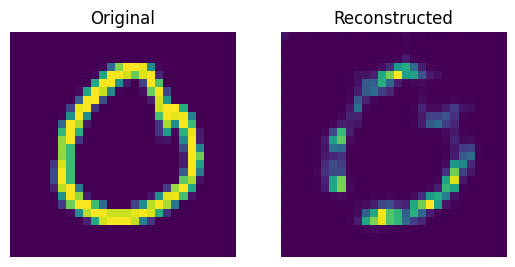

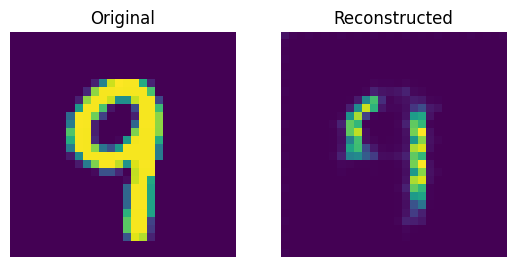

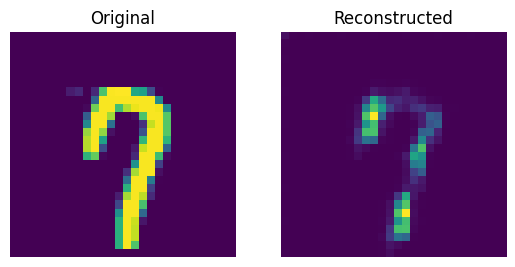

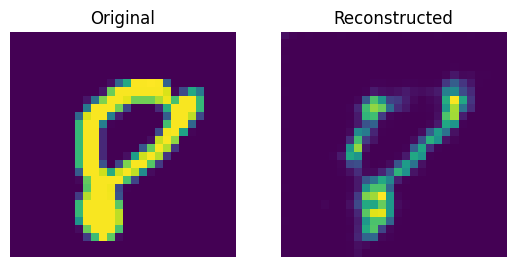

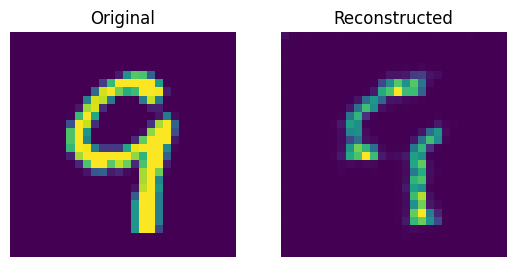

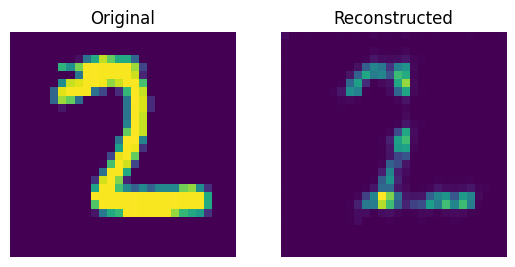

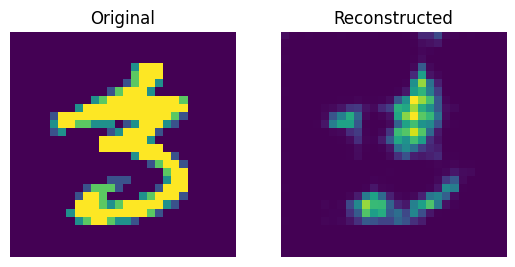

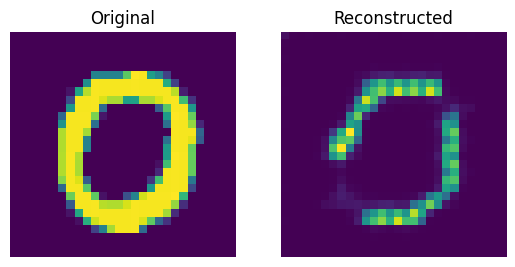

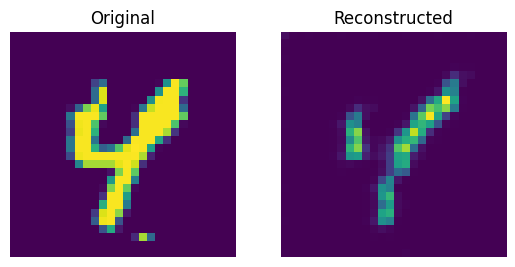

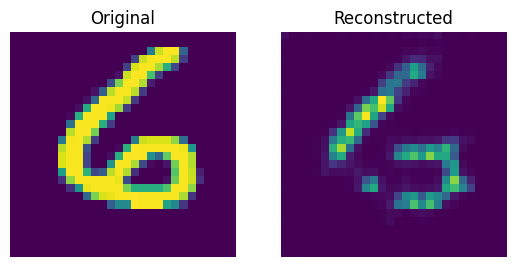

In [6]:
import matplotlib.pyplot as plt

def show_subplot(original, reconstructed):
    plt.subplot(1, 2, 1)
    plt.imshow(original.squeeze() + 0.5)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.squeeze() + 0.5)
    plt.title("Reconstructed")
    plt.axis("off")

    plt.show()


trained_vqvae_model = vq_vae
idx = np.random.choice(len(x_test_scaled), 10)
test_images = x_test_scaled[idx]
reconstructions_test = trained_vqvae_model.predict(test_images)

for test_image, reconstructed_image in zip(test_images, reconstructions_test):
    show_subplot(test_image, reconstructed_image)